In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.optimize import curve_fit
import os

CLEANING DATA

> Remove any countries that is not USA
> Remove any columns that doesn't need to be analysed
> Make date_time seperate, add date and time
> Extrapolate any date, time data that's missing#
>

In [40]:
nuforc = pd.read_csv("nuforc_reports.csv")
nuforc.shape
nuforc.info()

In [9]:
nuforc.describe()

,city_latitude,city_longitude
count,108899.000000,108899.000000
mean,38.333728,-95.197640
std,5.515961,17.976368
min,6.275000,-176.627400
25%,34.119279,-112.427217
50%,38.969000,-89.341800
75%,41.959843,-80.669550
max,70.639300,-8.592200


In [10]:
categorical = nuforc.dtypes[nuforc.dtypes == "object"].index
print(categorical)

nuforc[categorical].describe()

Index(['summary', 'country', 'city', 'state', 'date_time', 'shape', 'duration',
       'date', 'time'],
      dtype='object')


,summary,country,city,state,date_time,shape,duration,date,time
count,123484,123551,123271,123157,123551,117963,116901,123551,123551
unique,121011,1,17075,68,105793,23,12172,12945,1440
top,MADAR Node 143,USA,New York,CA,2015-11-07T18:00:00,light,5 minutes,2015-11-07,22:00:00
freq,68,123551,836,15159,104,25239,7729,288,6662


#VARIABLE DESCRIPTION


In [11]:
#Remove stats, posted, text and reported_link
#Reason - restates information already given
columns_to_delete = ["stats", "text", "posted", "report_link"]
nuforc = nuforc.drop(columns=columns_to_delete)


KeyError: "['stats', 'text', 'posted', 'report_link'] not found in axis"

In [ ]:
#Use for Duration

def sec_converter(duration_str):
    parts = duration_str.split()

    #Hanles NaN values
    if pd.isnull(duration_str):
        return None
    
    #handles vague or unkown values
    if duration_str == "?" or "few" in duration_str.lower():
        return None
    
    hours = 0
    minutes = 0
    seconds = 0

    #Checks for hours
    if "hour" in duration_str:
        hsecs = parts[0] * 60 * 60
        return hsecs
    
    #Checks for mins
    if "minute" in duration_str:
        msecs = parts[0] * 60
        return msecs
    
        #Checks for hours
    if "second" in duration_str:
        return parts[0]
    
    
    



In [ ]:
#only keeps USA
nuforc = nuforc[nuforc["country"] == "USA"]

In [ ]:
missing = nuforc.isnull().sum()
missing

summary              68
country               0
city                297
state               404
date_time          2313
shape              5695
duration           6775
city_latitude     15098
city_longitude    15098
dtype: int64

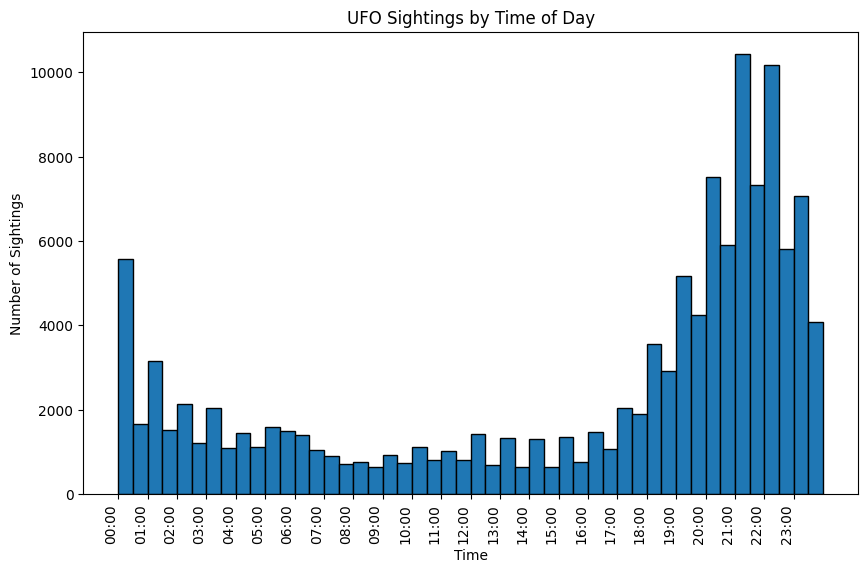

In [ ]:

# Create 'date' and 'time' columns
nuforc["date"] = nuforc["date_time"].str.split("T").str[0]
nuforc["time"] = nuforc["date_time"].str.split("T").str[1]

# Convert 'time' column to datetime.time objects
nuforc["time"] = pd.to_datetime(nuforc["time"], format='%H:%M:%S').dt.time

# Create a custom histogram
fig, ax = plt.subplots(figsize=(10, 6))
time_values = [time.hour + time.minute / 60 for time in nuforc["time"]]  # Convert time to fractional hours
ax.hist(time_values, bins=48, range=(0, 24), edgecolor="black")

# Set x-axis ticks and labels
ax.set_xticks(range(24))
ax.set_xticklabels([f"{hour:02d}:00" for hour in range(24)], rotation=90, ha="right")

# Set labels and title
ax.set_xlabel("Time")
ax.set_ylabel("Number of Sightings")
ax.set_title("UFO Sightings by Time of Day")

plt.show()

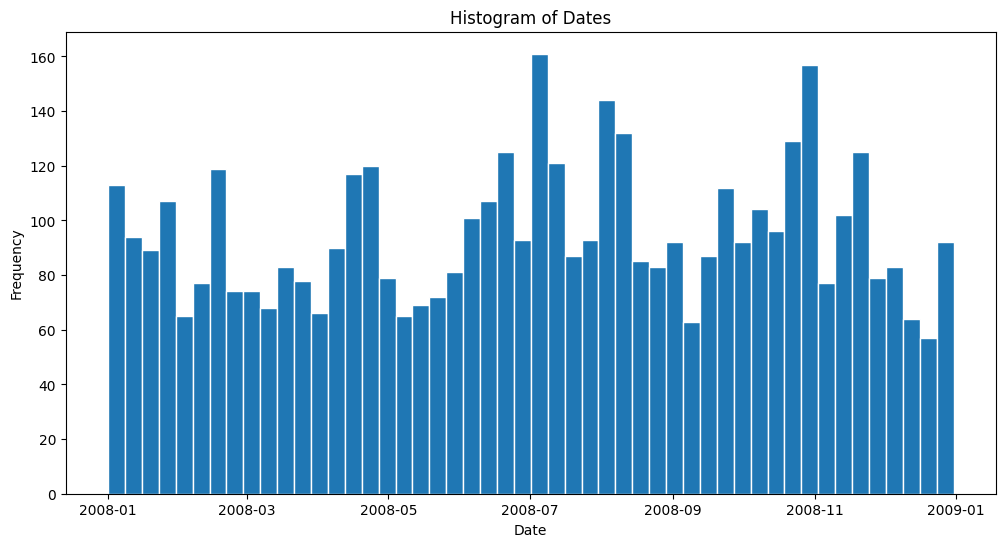

In [45]:
nuforc['date'] = pd.to_datetime(nuforc['date'])

plt.figure(figsize=(12,6))

# Filter data for the specific year
focus_year = nuforc[nuforc['date'].dt.year == 2008]

plt.hist(focus_year['date'],
         bins=50,
         edgecolor='white')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.title('Histogram of Dates')

#plt.xticks(pd.date_range(start=min(nuforc['date']), 
#                         end=max(nuforc['date']), 
#                         freq='YS'),
#            rotation=90)



# Show the histogram
plt.show()


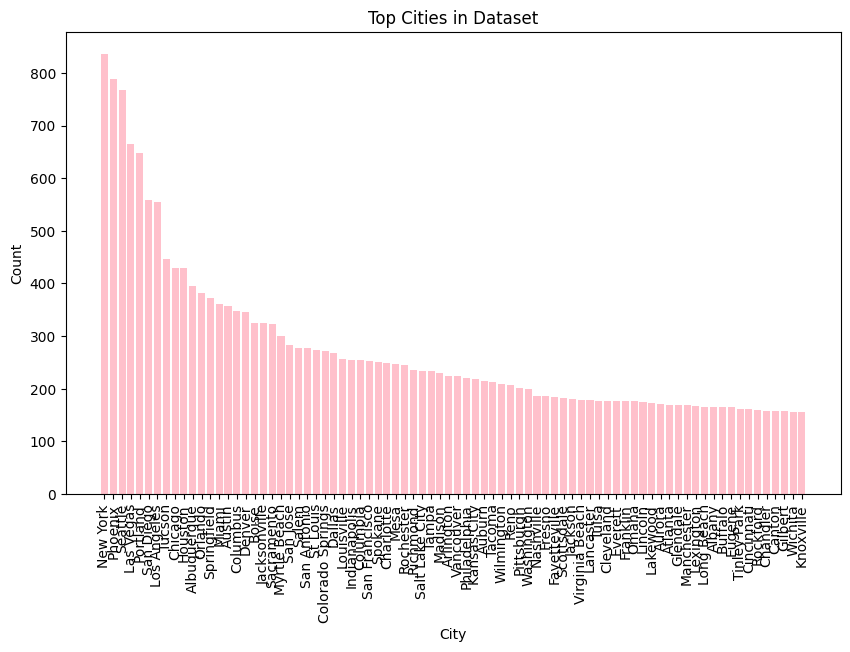

In [12]:
# Plot a bar plot for city distribution
city_counts = nuforc['city'].value_counts()


# Sort the city_counts by values in descending order
sorted_city_counts = city_counts.sort_values(ascending=False)

# Select the top N cities for better visualization
top_n = 80
top_cities = sorted_city_counts[:top_n]

# Create a bar plot
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(top_cities.index, top_cities.values, color='pink')

# Customize plot
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Top Cities in Dataset')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


# Show the plot
plt.show()



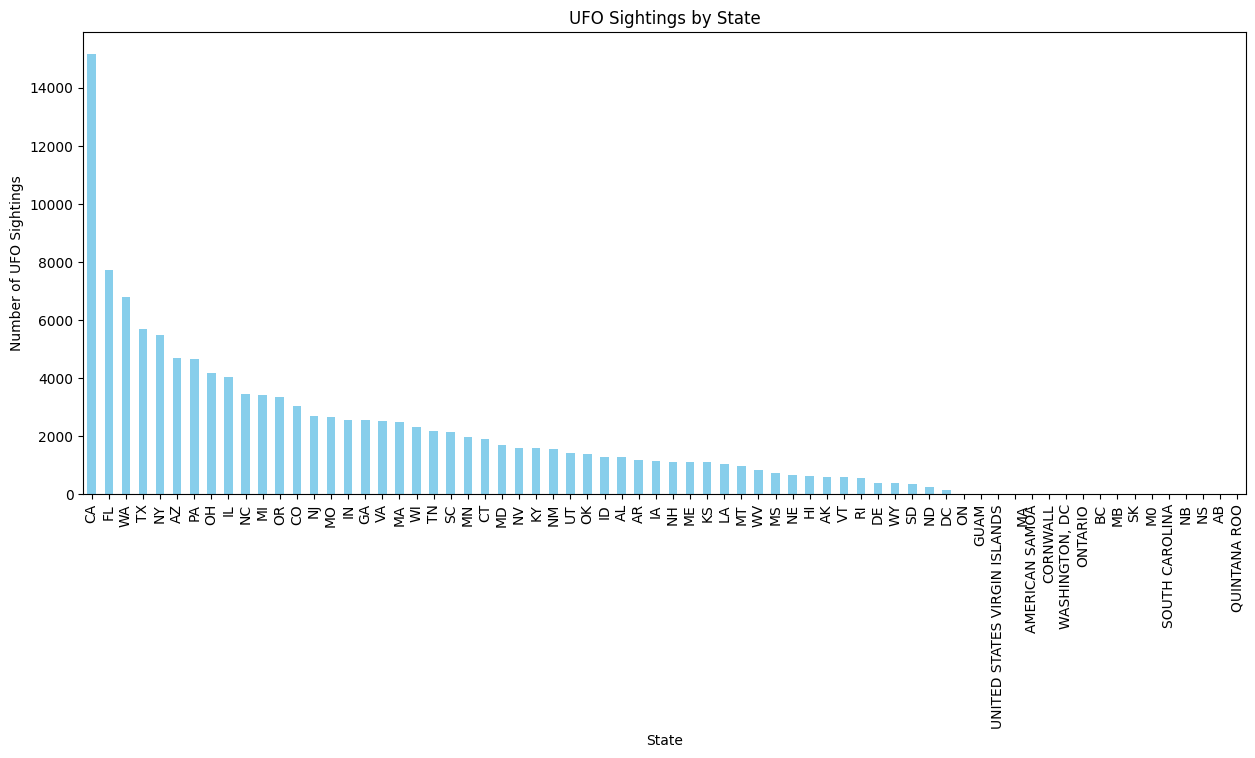

In [ ]:
# Aggregate data by state
state_counts = nuforc['state'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 6))
state_counts.plot(kind='bar', color='skyblue')

plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.title('UFO Sightings by State')

plt.xticks(rotation=90)
plt.show()

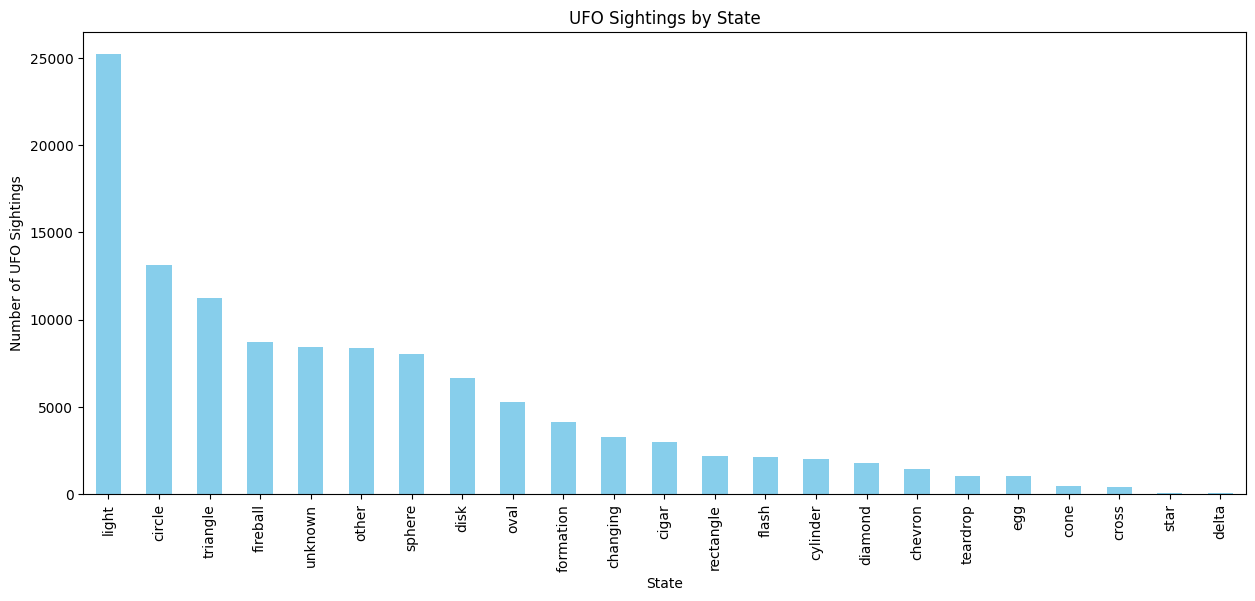

In [ ]:
# Aggregate data by state
shape_counts = nuforc['shape'].value_counts()

# Create a bar plot
plt.figure(figsize=(15, 6))
shape_counts.plot(kind='bar', color='skyblue')

plt.xlabel('State')
plt.ylabel('Number of UFO Sightings')
plt.title('UFO Sightings by State')

plt.xticks(rotation=90)
plt.show()

#remove the unknown/other shape

In [ ]:
data_file =  'nuforc_reports.csv'
nuforc.to_csv(data_file, index=False)